# Import required packages for model

In [50]:
## os to get audio file paths
import os
## re to replace filenames
import re
## data cleaning, normalize strange chars
#import unicode

#work with folder/file paths
import pathlib
#python math
import numpy as np
import librosa
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Create variables for data paths, test and train

In [51]:
DATASET_PATH = r"C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data"
train_dir = pathlib.Path(f'{DATASET_PATH}/Training')
test_dir = pathlib.Path(f'{DATASET_PATH}/Test')

if not train_dir.exists():
    print("Training path does not exist. Please check dataset location.")

if not test_dir.exists():
    print("Test path does not exist. Please check dataset location.")

print(train_dir)
print(test_dir)

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test


# Preliminary dataset - unsanitized

In [52]:
test_folder_names = np.array(tf.io.gfile.listdir(str(test_dir))) # ['Am' 'Bb' 'Bdim' 'C' 'Dm' 'Em' 'F' 'G']
train_folder_names = np.array(tf.io.gfile.listdir(str(train_dir)))

def list_audios_with_folder(base_path, folder_names):

    # An array of paths the each folder in Training
    folder_paths = [os.path.join(base_path, folderName) for folderName in folder_names if os.path.isdir(os.path.join(base_path, folderName))]

    
    # loop through every path, get every .wav in each foler add to array file_names[]
    result = {}
    for path in folder_paths:
        file_names = []
        for root, dirs, files in os.walk(path):
            for name in files:
                file_names.append(name)
            #path will be the key in each result dictionary
            result[path] = file_names
    return result

train_result = list_audios_with_folder(train_dir, train_folder_names)
for path, files in train_result.items():
    print(f"\n {path}")
    print(files)
        

test_result = list_audios_with_folder(test_dir, test_folder_names)
for path, files in test_result.items():
    print(f"\n {path}")
    print(files)
    



 C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am
['Am_001.wav', 'Am_002.wav', 'Am_003.wav', 'Am_004.wav', 'Am_005.wav', 'Am_006.wav', 'Am_007.wav', 'Am_008.wav', 'Am_009.wav', 'Am_010.wav', 'Am_011.wav', 'Am_012.wav', 'Am_013.wav', 'Am_014.wav', 'Am_015.wav', 'Am_016.wav', 'Am_017.wav', 'Am_018.wav', 'Am_019.wav', 'Am_020.wav', 'Am_021.wav', 'Am_022.wav', 'Am_023.wav', 'Am_024.wav', 'Am_025.wav', 'Am_026.wav', 'Am_027.wav', 'Am_028.wav', 'Am_029.wav', 'Am_030.wav', 'Am_031.wav', 'Am_032.wav', 'Am_033.wav', 'Am_034.wav', 'Am_035.wav', 'Am_036.wav', 'Am_037.wav', 'Am_038.wav', 'Am_039.wav', 'Am_040.wav', 'Am_041.wav', 'Am_042.wav', 'Am_043.wav', 'Am_044.wav', 'Am_045.wav', 'Am_046.wav', 'Am_047.wav', 'Am_048.wav', 'Am_049.wav', 'Am_050.wav', 'Am_051.wav', 'Am_052.wav', 'Am_053.wav', 'Am_054.wav', 'Am_055.wav', 'Am_056.wav', 'Am_057.wav', 'Am_058.wav', 'Am_059.wav', 'Am_060.wav', 'Am_061.wav', 'Am_062.wav', 'Am_063.wav', 'Am_064.wav', 'Am_065.wav', 'Am_066.wav', 'Am

# Processing data for Model: Filenames

In [53]:
# takes a  single file, cleans every .wav file inside
def clean_filename(filename, counter):
    name, ext = os.path.splitext(filename)
    clean_name = re.sub(r'[^\w\d-]+','-', name)
    label_name = clean_name.split('_')[0]
    return f"{label_name}_{counter:03d}{ext}"

# Loops ever folder, sends each file in folder to be cleaned
def clean_folder(folder_path):
    counter = 1
    for fname in os.listdir(folder_path):
        old_path = os.path.join(folder_path, fname)
        if os.path.isfile(old_path):
            new_fname = clean_filename(fname, counter)
            counter += 1
            new_path = os.path.join(folder_path, new_fname)
            if old_path != new_path:
                #print(f"Renaiming:\n {old_path} to {new_path}")
                os.rename(old_path, new_path)   


######### Clean Training data


#Loop all paths, clean file names in the paths
for path, files in train_result.items():
    clean_folder(path)
    
#loop every file DIR in Training
for path in train_result.keys():
    file_names = []
    print("Cleaned: " + path + "\n")
    for root, dirs, files in os.walk(path):
        for name in files:
            file_names.append(name)
    print(file_names)
    print("\n")

######### Clean Testing data

#Loop all paths, clean file names in the paths
for path, files in test_result.items():
    clean_folder(path)
    
#loop every file DIR in Test
for path in test_result.keys():
    file_names = []
    print("Cleaned: " + path + "\n")
    for root, dirs, files in os.walk(path):
        for name in files:
            file_names.append(name)
    print(file_names)
    print("\n")

Cleaned: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am

['Am_001.wav', 'Am_002.wav', 'Am_003.wav', 'Am_004.wav', 'Am_005.wav', 'Am_006.wav', 'Am_007.wav', 'Am_008.wav', 'Am_009.wav', 'Am_010.wav', 'Am_011.wav', 'Am_012.wav', 'Am_013.wav', 'Am_014.wav', 'Am_015.wav', 'Am_016.wav', 'Am_017.wav', 'Am_018.wav', 'Am_019.wav', 'Am_020.wav', 'Am_021.wav', 'Am_022.wav', 'Am_023.wav', 'Am_024.wav', 'Am_025.wav', 'Am_026.wav', 'Am_027.wav', 'Am_028.wav', 'Am_029.wav', 'Am_030.wav', 'Am_031.wav', 'Am_032.wav', 'Am_033.wav', 'Am_034.wav', 'Am_035.wav', 'Am_036.wav', 'Am_037.wav', 'Am_038.wav', 'Am_039.wav', 'Am_040.wav', 'Am_041.wav', 'Am_042.wav', 'Am_043.wav', 'Am_044.wav', 'Am_045.wav', 'Am_046.wav', 'Am_047.wav', 'Am_048.wav', 'Am_049.wav', 'Am_050.wav', 'Am_051.wav', 'Am_052.wav', 'Am_053.wav', 'Am_054.wav', 'Am_055.wav', 'Am_056.wav', 'Am_057.wav', 'Am_058.wav', 'Am_059.wav', 'Am_060.wav', 'Am_061.wav', 'Am_062.wav', 'Am_063.wav', 'Am_064.wav', 'Am_065.wav', 'Am_066.w

In [54]:
total_train_Count = 0
total_test_Count = 0

#Create array of chord paths in the training data folder.
training_folder_paths = [os.path.join(train_dir, folderName) for folderName in train_folder_names if os.path.isdir(os.path.join(train_dir, folderName))]

for path in training_folder_paths:
    count = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            count += 1
    print(path, " total: ", count)
    total_train_Count += count
print( "\n", "Training files total: ", total_train_Count, "\n")

#Create array of chord paths in the testing data folder.
testing_folder_paths = [os.path.join(test_dir, folderName) for folderName in test_folder_names if os.path.isdir(os.path.join(test_dir, folderName))]

for path in testing_folder_paths:
    count = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            count += 1
    print(path, " total: ", count)
    total_test_Count += count
print( "\n", "Testing files total: ", total_test_Count)

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bb  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bdim  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\C  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Dm  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Em  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\F  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\G  total:  180

 Training files total:  1440 

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Am  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bb  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bdim  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\C  tot

In [55]:
# folder names for each dataset of chords
# test_folder_names
# train_folder_names

label_to_index = {str(label): i for i, label in enumerate(train_folder_names)}
index_to_label = {i: str(label) for label, i in label_to_index.items()}

print("Creating Full path for each training file: " + "\n")
training_samples = []
for root, dirs, files in os.walk(train_dir):
    for name in files:
        full_path = os.path.join(root, name)
        training_samples.append(full_path)
print("Example: ", training_samples[0], "\n")


print("Creating full path for each testing file: " + "\n")
testing_samples = []
for root, dirs, files in os.walk(test_dir):
    for name in files:
        full_path = os.path.join(root, name)
        testing_samples.append(full_path)
print("Example: ", testing_samples[0])

# paths: 
# training_samples
# testing_samples

Creating Full path for each training file: 

Example:  C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_001.wav 

Creating full path for each testing file: 

Example:  C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Am\Am_001.wav


# Create uniform audio files 32kHz (2 seconds)

In [56]:
# Array of chord paths in the training data folder: training_folder_paths
# Array of chord paths in the testing data folder: testing_folder_paths


#Set length of all audios, to 32kHz so the diagrams are uniform by take a folder path
def load_and_set_wav_files(folder_path, target_sr=32000, target_len=32000):
    audios = []
    labels = []
    file_names = []
    paths = []

    label = str(os.path.basename(folder_path))
    label_index = label_to_index.get(label)

    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            y, sr = librosa.load(file_path, sr=target_len, mono=True)
            y = librosa.util.fix_length(y, size=target_len)
            audios.append(y)
            labels.append(label_index)
            paths.append(file_path)
            file_names.append(file)

    if audios:
        print(f"Label: {labels[0]}, Shape: {audios[0].shape}, Total fixed: {len(audios)}")
            
    #Each .wav now label by number below
    return audios, labels, sr, file_names, paths

print("shaping all audios to length 32000")


audios = []
labels = []
file_names = []
paths = []

# For every  training folder path, load_and_set_wav_files()
for path in training_folder_paths:
    audios_batch, labels_batch, sr, file_names_batch, paths_batch = load_and_set_wav_files(path)
    audios.extend(audios_batch)
    labels.extend(labels_batch)
    file_names.extend(file_names_batch)
    paths.extend(paths_batch)

waveform_ds = [audios, labels, file_names, paths]

print(f"first audio sample filename: {paths[0]}")
print(f"Label index: {labels[0]}")
print(f"File name: {file_names[0]}")

test_audios = []
test_labels = []
test_file_names = []
test_paths = []

# For every test folder path, load_and_set_wav_files()
for path in testing_folder_paths:
    audios_batch, labels_batch, sr, file_names_batch, paths_batch = load_and_set_wav_files(path)
    test_audios.extend(audios_batch)
    test_labels.extend(labels_batch)
    test_file_names.extend(file_names_batch)
    test_paths.extend(paths_batch)

test_waveform_ds = [test_audios, test_labels, test_file_names, test_paths]

print(f"Test first audio sample filename: {test_paths[0]}")
print(f"Test label index: {test_labels[0]}")
print(f"Test file name: {test_file_names[0]}")

shaping all audios to length 32000
Label: 0, Shape: (32000,), Total fixed: 180
Label: 1, Shape: (32000,), Total fixed: 180
Label: 2, Shape: (32000,), Total fixed: 180
Label: 3, Shape: (32000,), Total fixed: 180
Label: 4, Shape: (32000,), Total fixed: 180
Label: 5, Shape: (32000,), Total fixed: 180
Label: 6, Shape: (32000,), Total fixed: 180
Label: 7, Shape: (32000,), Total fixed: 180
first audio sample filename: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_001.wav
Label index: 0
File name: Am_001.wav
Label: 0, Shape: (32000,), Total fixed: 40
Label: 1, Shape: (32000,), Total fixed: 40
Label: 2, Shape: (32000,), Total fixed: 40
Label: 3, Shape: (32000,), Total fixed: 40
Label: 4, Shape: (32000,), Total fixed: 40
Label: 5, Shape: (32000,), Total fixed: 40
Label: 6, Shape: (32000,), Total fixed: 40
Label: 7, Shape: (32000,), Total fixed: 40
Test first audio sample filename: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Am\Am_001.wav
Test label 

# Visualize waveforms

In [57]:
test_count = 0
count = 0

for i in range(len(audios)):
    count +=1
    print(f"Path: {paths[i]}, Label index: {labels[i]}, File name: {file_names[i]}")

for i in range(len(test_audios)):
    test_count += 1
    print(f"Path: {test_paths[i]}, Label index: {test_labels[i]}, File name: {test_file_names[i]}")
print("Test Total: ",test_count)
print("Train total: ", count)

Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_001.wav, Label index: 0, File name: Am_001.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_002.wav, Label index: 0, File name: Am_002.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_003.wav, Label index: 0, File name: Am_003.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_004.wav, Label index: 0, File name: Am_004.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_005.wav, Label index: 0, File name: Am_005.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_006.wav, Label index: 0, File name: Am_006.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_007.wav, Label index: 0, File name: Am_007.wav
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_008.wav, Label index: 0, File name: Am_

In [58]:
print(type(audios))

<class 'list'>


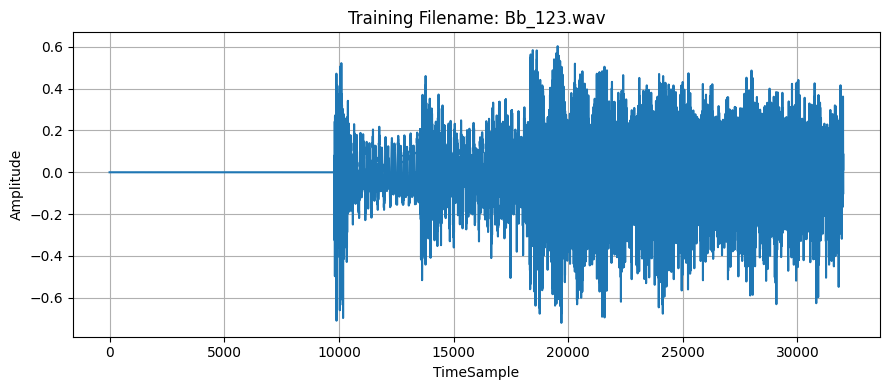

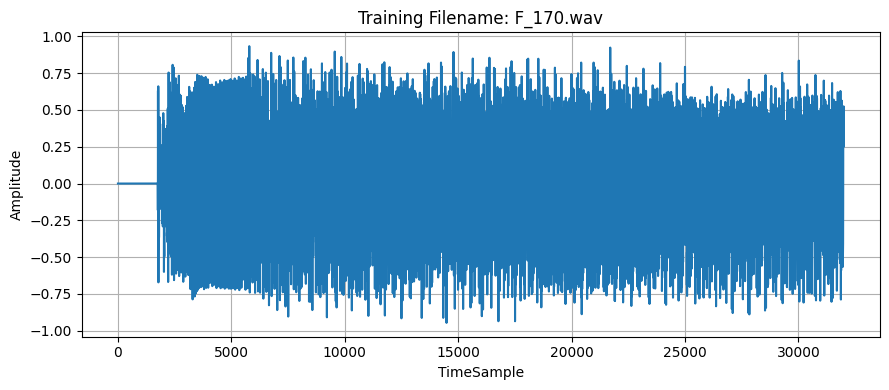

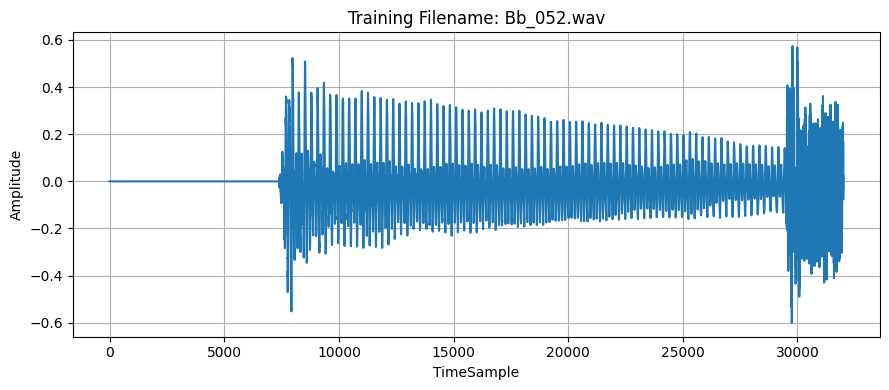

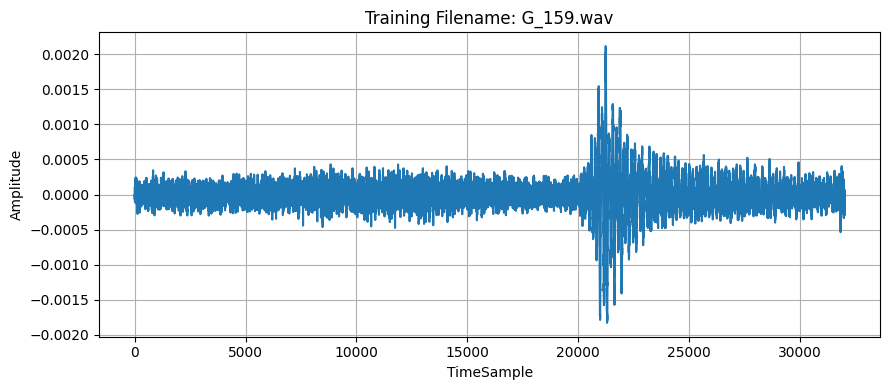

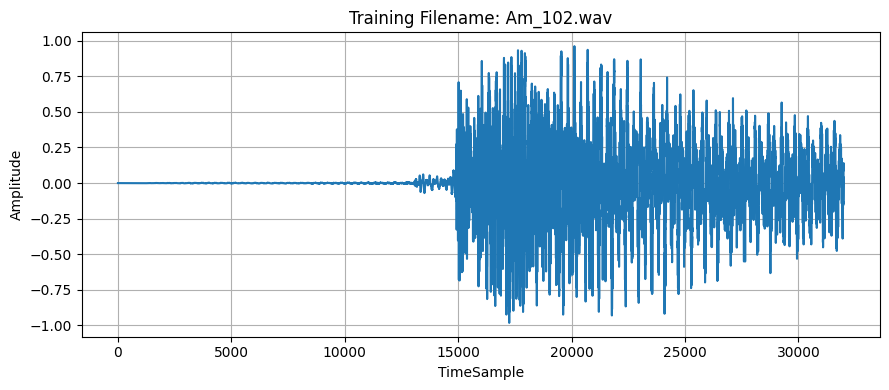

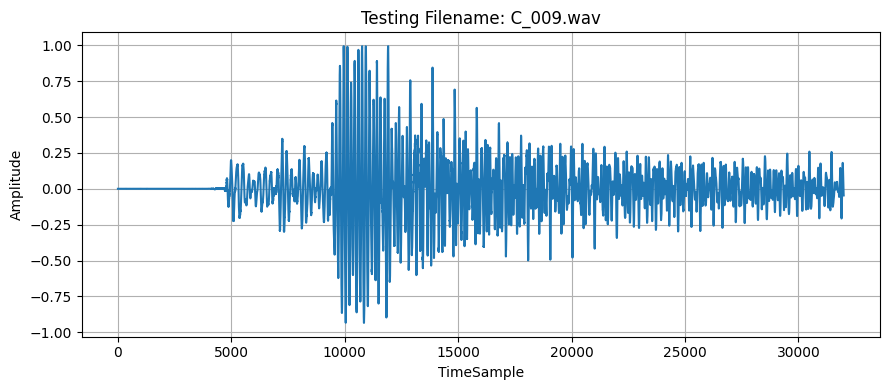

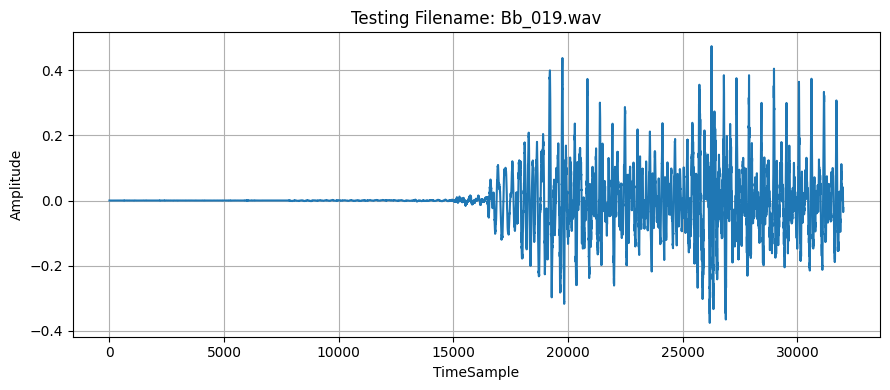

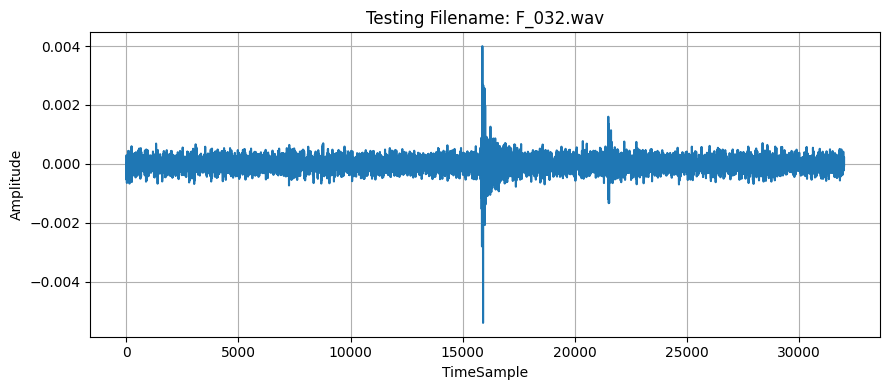

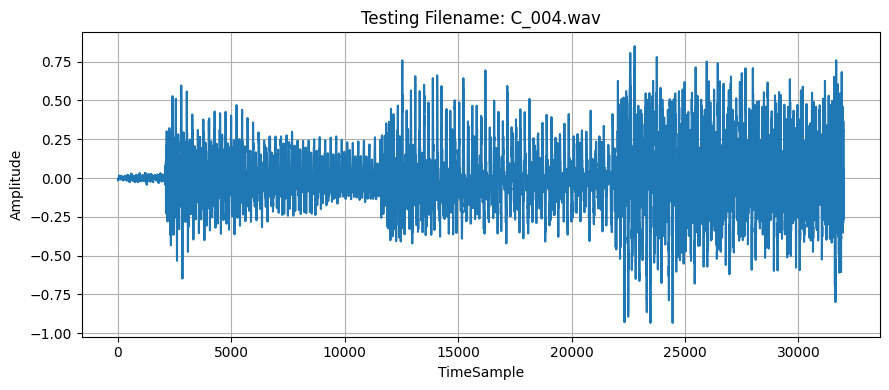

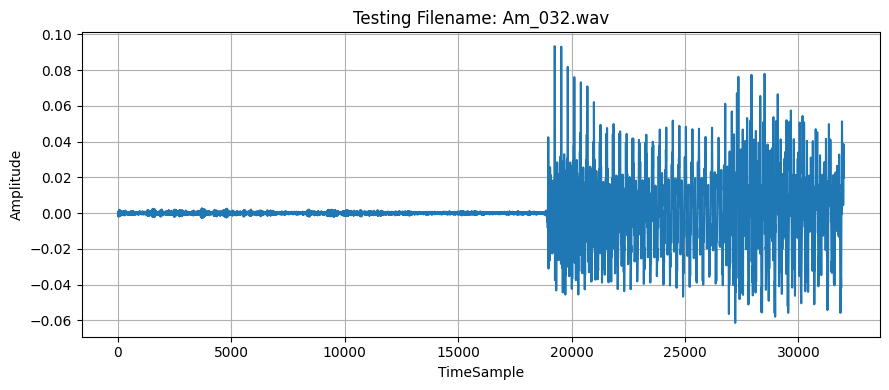

In [59]:
import random

training_samples = random.sample(range(len(audios)), 5)
for i in training_samples:
    plt.figure(figsize=(9, 4))
    plt.plot(audios[i])
    plt.title(f"Training Filename: {os.path.basename(file_names[i])}")
    plt.xlabel("TimeSample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

test_samples = random.sample(range(len(test_audios)), 5)
for i in test_samples:
    plt.figure(figsize=(9, 4))
    plt.plot(test_audios[i])
    plt.title(f"Testing Filename: {os.path.basename(test_file_names[i])}")
    plt.xlabel("TimeSample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    

In [60]:
print(label_to_index)

{'Am': 0, 'Bb': 1, 'Bdim': 2, 'C': 3, 'Dm': 4, 'Em': 5, 'F': 6, 'G': 7}


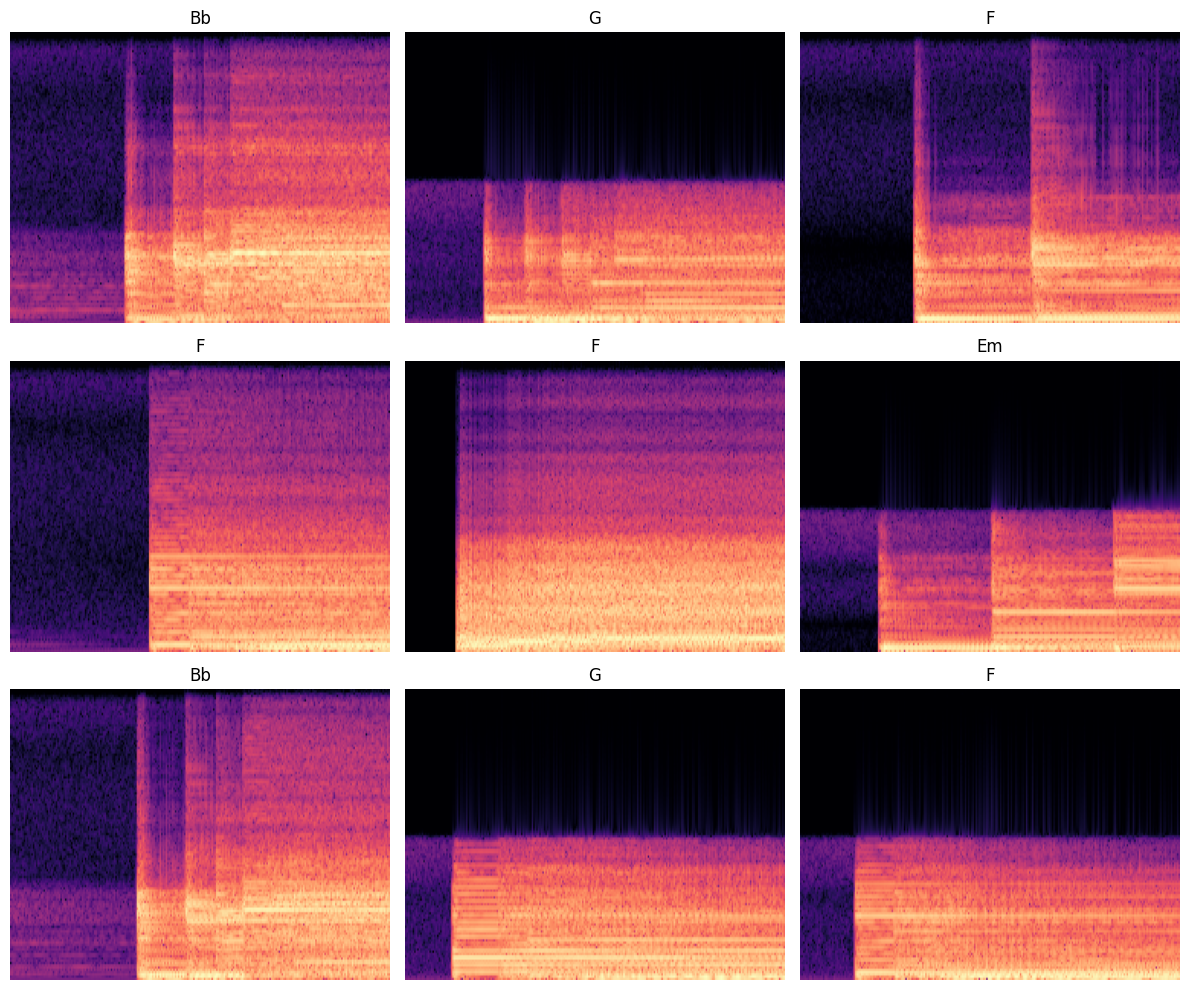

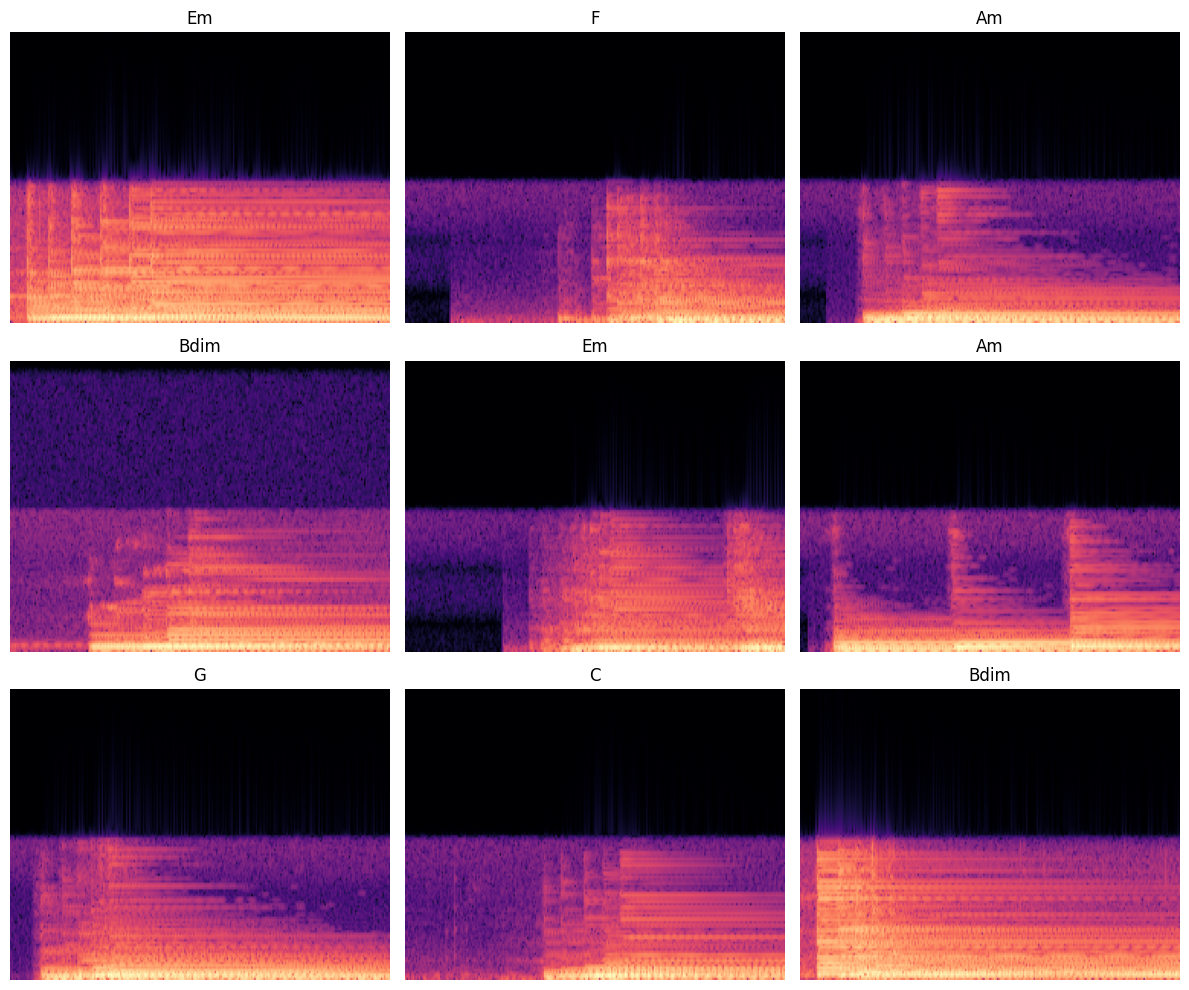

In [61]:

def convert_to_spectrogram(waveform):
    waveform = tf.cast(waveform, dtype=tf.float32)
    waveform = tf.reshape(waveform, [-1])
    spectrogram = tf.signal.stft(
        waveform,
        frame_length=256,
        frame_step=128,
        fft_length=256
    )
    # Increase magnitude of spectogram, for better images
    spectrogram = tf.abs(spectrogram) ** 2
    spectrogram_db = 10 * tf.math.log(spectrogram + 1e-10) / tf.math.log(10.0)
    return spectrogram_db

def plot_spectrograms(spectrogram_ds):
    rows = 3
    cols = 3
    n = rows * cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    for i, (spectrogram, label_index) in enumerate(spectrogram_ds[:n]):
        r = i // cols
        c = i % cols
        ax = axes[r][c]
        ax.imshow(tf.transpose(spectrogram).numpy(), aspect='auto', origin='lower', cmap='magma')
        ax.set_title(index_to_label[label_index])
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
#standardize all spetrograms
def normalize(spectrogram):
    mean = tf.math.reduce_mean(spectrogram)
    std = tf.math.reduce_std(spectrogram)
    return(spectrogram - mean) / (std + 1e-10)

############ TRAINING Collect all spectrograms and labels to be sent to plot_spectrogram()
#waveform_ds = []

audios, labels, file_names, paths = waveform_ds
spectrogram_ds = []
# arrays for training spectrograms
X = []
Y = []

for waveform, label_index in zip(audios, labels):
    spectrogram = convert_to_spectrogram(waveform)
    normalized_spectrogram = normalize(spectrogram)
    #prep spectrograms for training
    X.append(normalized_spectrogram)
    Y.append(label_index)
    spectrogram_ds.append((normalized_spectrogram, label_index))
    
X = tf.stack(X)
Y = tf.convert_to_tensor(Y)

# Display a grid of spectrograms
random_specs = random.sample(range(len(spectrogram_ds)), 9)

sample_specs = [spectrogram_ds[i] for i in random_specs]
plot_spectrograms(sample_specs)

#@@@@@@@@@@@ TESTING Collect all spectrograms and labels to be sent to plot_spectrogram()
#waveform_ds = []

test_audios, test_labels, test_file_names, test_paths = test_waveform_ds
test_spectrogram_ds = []
# arrays for training
test_X = []
test_Y = []

for waveform, label_index in zip(test_audios, test_labels):
    test_spectrogram = convert_to_spectrogram(waveform)
    test_normalized_spectrogram = normalize(test_spectrogram)
    #prep spectrograms for training
    test_X.append(test_normalized_spectrogram)
    test_Y.append(label_index)
    test_spectrogram_ds.append((test_normalized_spectrogram, label_index))
    
test_X = tf.stack(test_X)
test_Y = tf.convert_to_tensor(test_Y)

# Display a grid of spectrograms
test_random_specs = random.sample(range(len(test_spectrogram_ds)), 9)
test_sample_specs = [test_spectrogram_ds[i] for i in test_random_specs]

plot_spectrograms(test_sample_specs)

# Convolution Neural Network Model training

In [62]:
print("Testing dataset and label dimensions: ")
print("Test Spec dataset shape: ", np.array(test_X).shape)
print("test Labels shape: ", np.array(test_Y).shape)

print("\nTraining dataset and label dimensions: ")
print("Spec dataset shape: ", np.array(X).shape)
print("Labels shape: ", np.array(Y).shape)


Testing dataset and label dimensions: 
Test Spec dataset shape:  (320, 249, 129)
test Labels shape:  (320,)

Training dataset and label dimensions: 
Spec dataset shape:  (1440, 249, 129)
Labels shape:  (1440,)


In [63]:
## Create a validation set from Training to validate the model

# Tensorflow does not allow direct indexing of tensors, so convert to array:

X_np = X.numpy()
Y_np = Y.numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X_np, Y_np, test_size=0.2, random_state=42
)


# Fit model

In [73]:
## IMPORTED AT TOP: from tensorflow.keras import layers, models

#Input shape to match spectrogram dimensions, 1 is greyscale
input_shape = (249, 129, 1)

# Fit the state of the layer to the spectrograms

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(63, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(len(label_to_index), activation='softmax')
    ])

model.summary()
                  

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 247, 127, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 123, 63, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 121, 61, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 60, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 58, 28, 63)          │          18,207 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 29, 14, 63)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25578)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,274,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,298,151 (12.58 MB)

 Trainable params: 3,298,151 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

# Epochs are how many times to model passes the dataset
EPOCHS = 10
## DATA - training sets, test sets, size of test, callback in event of error
## EarlyStopping eith patience=3 if no improvement is seen in epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    callbacks=EarlyStopping(verbose=1, patience=3),
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.7332 - loss: 0.8367 - val_accuracy: 0.6910 - val_loss: 1.0682
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.7797 - loss: 0.6650 - val_accuracy: 0.7049 - val_loss: 1.0670
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.8048 - loss: 0.5639 - val_accuracy: 0.7014 - val_loss: 1.1495
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.8384 - loss: 0.5105 - val_accuracy: 0.7049 - val_loss: 1.1249
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.8257 - loss: 0.5018 - val_accuracy: 0.7014 - val_loss: 1.2637
Epoch 5: early stopping


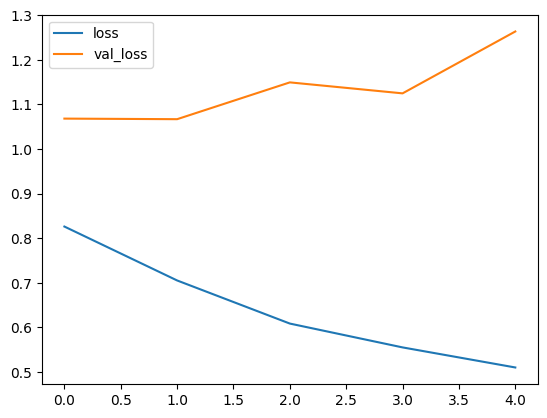

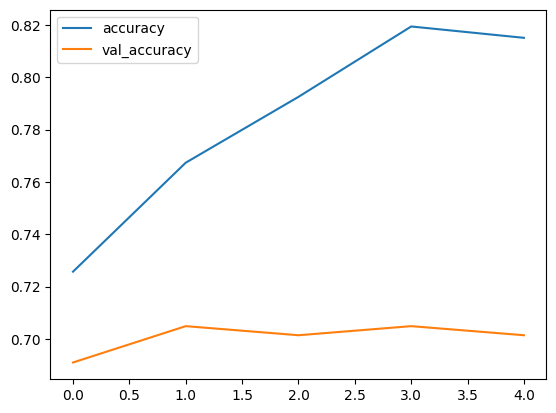

In [78]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# Accuracy over each Epoch improves over time, then plataus. Early stopping

# Confusion Matrix

In [ ]:
print("y_test shape: ", y_test.shape)
print("y_pred_probs shape: ", y_pred_probs.shape)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


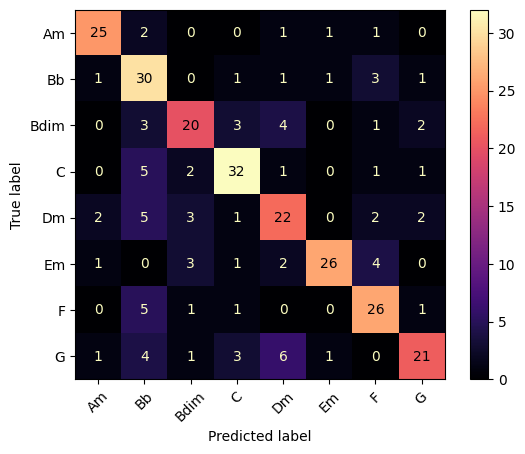

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(label_to_index.keys()))
disp.plot(cmap='magma',
          xticks_rotation=45)
plt.title=("Confusion Matrix")
plt.show()

In [96]:
model.save('/models/chord_model.keras')

In [97]:
print(os.getcwd())

C:\Users\shane\Documents\GitHub\Chord_App\notebooks
